# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! ls

drive  sample_data


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

In [4]:
ROOTPATH = '/content/drive/MyDrive'
DATAPATH = ROOTPATH+'/Thesis/training_set'
TRAINPATH = ROOTPATH+'/Thesis/training_set'
TESTPATH = ROOTPATH+'/Thesis/testing_set'
MODEL_PATH = ROOTPATH+'/Thesis/model'

In [5]:
two=glob.glob(DATAPATH+'/1.two/*.*')
five=glob.glob(DATAPATH+'/2.five/*.*')
ten=glob.glob(DATAPATH+'/3.ten/*.*')
twenty=glob.glob(DATAPATH+'/4.twenty/*.*')
fifty=glob.glob(DATAPATH+'/5.fifty/*.*')
one_hundred=glob.glob(DATAPATH+'/6.one_hundred/*.*')
two_hundred=glob.glob(DATAPATH+'/7.two_hundred/*.*')
five_hundred=glob.glob(DATAPATH+'/8.five_hundred/*.*')
one_thousand=glob.glob(DATAPATH+'/9.one_thousand/*.*')

In [6]:
print('two: ',len(two))
print('five : ',len(five))
print('ten: ',len(ten))
print('twenty: ',len(twenty))
print('fifty: ',len(fifty))
print('one_hundred: ',len(one_hundred))
print('two_hundred: ',len(two_hundred))
print('five_hundred: ',len(five_hundred))
print('one_thousand: ',len(one_thousand))

two:  600
five :  600
ten:  600
twenty:  600
fifty:  600
one_hundred:  600
two_hundred:  600
five_hundred:  600
one_thousand:  600


In [7]:
dataset_classes=[two,five,ten,twenty,fifty,one_hundred,two_hundred,five_hundred,one_thousand]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  9


In [8]:
IMAGE_SIZE=224
BATCH_SIZE=16

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
         shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')


Found 4320 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 575 images belonging to 9 classes.


In [10]:
training_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [11]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  9


In [12]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=256 , kernel_size=3 , activation='relu' , input_shape=[224,224,3],padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


cnn.add(tf.keras.layers.Conv2D(filters=128 , kernel_size=3 , activation='relu', padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 ,  activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 ))

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 ,  activation='relu', padding='same' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=9, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation ='softmax'))

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [14]:
cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODEL_PATH+'SVM_CNN2.model.best.hdf5', verbose=1 ,save_best_only=True)

In [ ]:
history=cnn.fit(training_set,
                batch_size=BATCH_SIZE,
                epochs=50,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/50
270/270 [==============================] - ETA: 0s - loss: 1.1732 - accuracy: 0.5752
Epoch 1: val_loss improved from inf to 0.82699, saving model to /content/drive/MyDrive/Thesis/modelSVM_CNN2.model.best.hdf5
270/270 [==============================] - 584s 2s/step - loss: 1.1732 - accuracy: 0.5752 - val_loss: 0.8270 - val_accuracy: 0.7028
Epoch 2/50
270/270 [==============================] - ETA: 0s - loss: 0.5625 - accuracy: 0.8190
Epoch 2: val_loss improved from 0.82699 to 0.43893, saving model to /content/drive/MyDrive/Thesis/modelSVM_CNN2.model.best.hdf5
270/270 [==============================] - 99s 365ms/step - loss: 0.5625 - accuracy: 0.8190 - val_loss: 0.4389 - val_accuracy: 0.8593
Epoch 3/50
270/270 [==============================] - ETA: 0s - loss: 0.2689 - accuracy: 0.9227
Epoch 3: val_loss improved from 0.43893 to 0.40489, saving model to /content/drive/MyDrive/Thesis/modelSVM_CNN2.model.best.hdf5
270/270 [==============================] - 102s 376ms/step - loss:

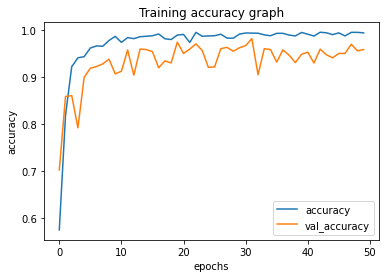

In [18]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

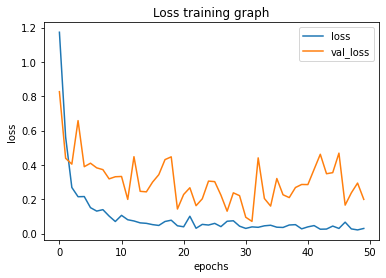

In [19]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [20]:
test_loss,test_accuracy=cnn.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

36/36 [==============================] - 131s 4s/step - loss: 0.5429 - accuracy: 0.9304
Test Loss:  0.5428751707077026
Test Accuracy:  0.9304347634315491


In [21]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  93.04347634315491


In [22]:
predicted_result=cnn.predict(test_set)
predicted_result[:5]

array([[1.00000000e+00, 2.81519497e-09, 3.03114711e-13, 1.91854518e-12,
        4.79752651e-14, 6.12047847e-14, 8.85958092e-15, 6.66377164e-13,
        1.07680469e-14],
       [1.00000000e+00, 4.67748285e-09, 3.25101443e-14, 3.51261961e-13,
        2.34115773e-14, 3.16668621e-14, 4.14322482e-15, 2.23190512e-13,
        8.19233495e-15],
       [1.00000000e+00, 5.43222933e-09, 4.50748651e-14, 4.82676236e-13,
        2.70154179e-14, 3.59129027e-14, 4.67708469e-15, 2.54898858e-13,
        9.45161206e-15],
       [1.00000000e+00, 4.49337723e-09, 4.05706488e-14, 4.43759829e-13,
        2.33508383e-14, 3.25778019e-14, 3.98608157e-15, 2.41048636e-13,
        8.24525757e-15],
       [9.99998450e-01, 1.52320047e-06, 7.97414046e-09, 3.37098918e-08,
        6.55038468e-09, 1.25139685e-08, 2.11966578e-09, 1.44983607e-08,
        8.89491414e-09]], dtype=float32)

In [23]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0])

In [24]:
test_classes=test_set.classes
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[72  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0]
 [ 0  0  0 29  0 38  0  0  5]
 [ 0  0  0  0  0  0 47  0  0]
 [ 0  0  5  0  1  0  0 66  0]
 [ 0  0  0  0  0  0  0  0 72]]


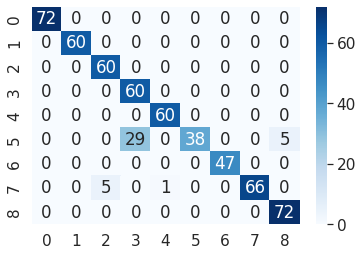

In [26]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.9304347826086956


In [28]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        60
           2       0.92      1.00      0.96        60
           3       0.67      1.00      0.81        60
           4       0.98      1.00      0.99        60
           5       1.00      0.53      0.69        72
           6       1.00      1.00      1.00        47
           7       1.00      0.92      0.96        72
           8       0.94      1.00      0.97        72

    accuracy                           0.93       575
   macro avg       0.95      0.94      0.93       575
weighted avg       0.95      0.93      0.93       575



In [29]:

export_path_keras = "/content/drive/MyDrive/Model/SVM_Model_1_CNN2.h5"
print(export_path_keras)
cnn.save(export_path_keras)

/content/drive/MyDrive/Model/SVM_Model_1_CNN2.h5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import pyttsx3 
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:

export_path_keras = "Final Thesis/Saved Model/2.SVM_with_CNN2.h5"
print(export_path_keras)
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Final Thesis/Saved Model/2.SVM_with_CNN2.h5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Co

In [4]:
print(len(reload_model.weights))
print(reload_model.output_shape)

16
(None, 9)


In [5]:
reload_model.layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def noteclass(cls):
    txt=pyttsx3.init()
    if cls==0:
        ans="Two Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==1:
        ans="Five Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="Ten Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="Twenty Taka"
        print(ans)
        txt.say(ans)
       # txt.runAndWait()
    elif cls==4:
        ans="Fifty Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="One Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="Two Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="Five Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="One Thousand Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    

One Hundred Taka


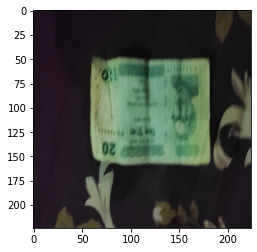

In [7]:
random_image=image.load_img('E:/AThesis/anotation/anotated img/5/new680.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

Five Hundred Taka


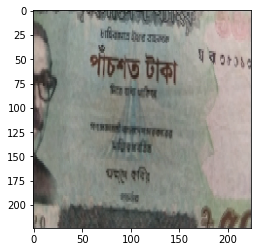

In [8]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('E:/AThesis/Final/testing_set/8.five_hundred/five_hundred31.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

Fifty Taka


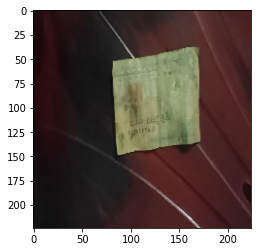

In [9]:
#""E:\AThesis\anotation\anotated img\2\21493.png"""
random_image=image.load_img('E:/AThesis/anotation/anotated img/2/21493.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

Two Taka


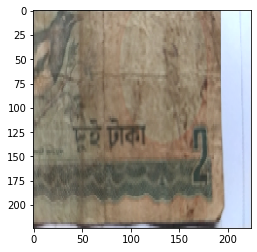

In [10]:
random_image=image.load_img('E:/AThesis/Final/testing_set/1.two/two1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

Twenty Taka


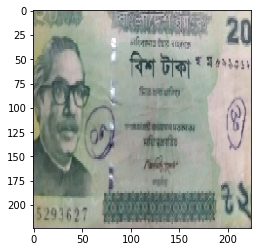

In [11]:
random_image=image.load_img('E:/AThesis/Final/testing_set/4.twenty/twenty5.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
noteclass(np.argmax(predicted_class))
#print('True classification')

One Hundred Taka


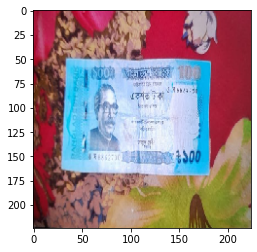

In [12]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('C:/Users/Niloy/Pictures/Camera Roll/100.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))